In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import glob
from upsetplot import from_contents, plot
from matplotlib import pyplot

from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

from dfmodel import DigitalFamilyBinary

# Set the font to Arial
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

In [2]:
prediction_files = glob.glob(
    "../3_feature_selection_organ_dysfunction/predictions_test/*.tsv"
)

infection_prediction_files = glob.glob(
    "../4_feature_selection_infection/predictions_test/*.tsv"
)

In [3]:
prediction_files = prediction_files + infection_prediction_files

In [4]:

from pathlib import Path

all_predictions = []

for prediction_file in prediction_files:

    path = Path(prediction_file)

    panel_type = path.name.split("_")[0]

    predictions = pd.read_csv(
        prediction_file,
        sep="\t",
        index_col=0
    )

    all_predictions.append(predictions)


In [5]:
all_predictions = pd.concat(all_predictions, axis=1)

In [6]:
design_matrix_test = pd.read_csv(
    "../0_data/design_matrix_test.tsv",
    sep='\t'
)

In [7]:
design_matrix_test = design_matrix_test.set_index("injection").join(all_predictions).reset_index()

In [8]:
val_prediction_files = glob.glob(
    "../3_feature_selection_organ_dysfunction/predictions_val/*.tsv"
)

val_infection_prediction_files = glob.glob(
    "../4_feature_selection_infection/predictions_val/*.tsv"
)

val_prediction_files = val_prediction_files + val_infection_prediction_files

In [9]:
val_prediction_files

['../3_feature_selection_organ_dysfunction/predictions_val/respiratory.tsv',
 '../3_feature_selection_organ_dysfunction/predictions_val/coag.tsv',
 '../3_feature_selection_organ_dysfunction/predictions_val/liver.tsv',
 '../3_feature_selection_organ_dysfunction/predictions_val/cns.tsv',
 '../3_feature_selection_organ_dysfunction/predictions_val/renal.tsv',
 '../3_feature_selection_organ_dysfunction/predictions_val/cardiovasc.tsv',
 '../4_feature_selection_infection/predictions_val/infection.tsv',
 '../4_feature_selection_infection/predictions_val/abdominal.tsv',
 '../4_feature_selection_infection/predictions_val/sst.tsv',
 '../4_feature_selection_infection/predictions_val/lowerresp.tsv',
 '../4_feature_selection_infection/predictions_val/ecoli.tsv',
 '../4_feature_selection_infection/predictions_val/bacteremia.tsv',
 '../4_feature_selection_infection/predictions_val/uti.tsv']

In [10]:

from pathlib import Path

val_all_predictions = []

for val_prediction_file in val_prediction_files:

    path = Path(val_prediction_file)

    panel_type = path.name.split("_")[0]

    val_predictions = pd.read_csv(
        val_prediction_file,
        sep="\t",
        index_col=0
    )

    val_all_predictions.append(val_predictions)


In [11]:
val_all_predictions = pd.concat(val_all_predictions, axis=1)

In [12]:
design_matrix_val = pd.read_csv(
    "../0_data/design_matrix_validation.tsv",
    sep='\t'
)

In [13]:
design_matrix_val = design_matrix_val.set_index("injection").join(val_all_predictions).reset_index()

In [14]:
hero_prediction_files = glob.glob(
    "../3_feature_selection_organ_dysfunction/predictions_external/*.tsv"
)

hero_infection_prediction_files = glob.glob(
    "../4_feature_selection_infection/predictions_external/*.tsv"
)

hero_prediction_files = hero_prediction_files + hero_infection_prediction_files

In [15]:
hero_prediction_files

['../3_feature_selection_organ_dysfunction/predictions_external/respiratory.tsv',
 '../3_feature_selection_organ_dysfunction/predictions_external/coag.tsv',
 '../3_feature_selection_organ_dysfunction/predictions_external/liver.tsv',
 '../3_feature_selection_organ_dysfunction/predictions_external/cns.tsv',
 '../3_feature_selection_organ_dysfunction/predictions_external/renal.tsv',
 '../3_feature_selection_organ_dysfunction/predictions_external/cardiovasc.tsv',
 '../4_feature_selection_infection/predictions_external/infection.tsv',
 '../4_feature_selection_infection/predictions_external/abdominal.tsv',
 '../4_feature_selection_infection/predictions_external/sst.tsv',
 '../4_feature_selection_infection/predictions_external/lowerresp.tsv',
 '../4_feature_selection_infection/predictions_external/ecoli.tsv',
 '../4_feature_selection_infection/predictions_external/bacteremia.tsv',
 '../4_feature_selection_infection/predictions_external/uti.tsv']

In [16]:

from pathlib import Path

hero_all_predictions = []

for hero_prediction_file in hero_prediction_files:

    path = Path(hero_prediction_file)

    panel_type = path.name.split("_")[0]

    hero_predictions = pd.read_csv(
        hero_prediction_file,
        sep="\t",
        index_col=0
    )

    hero_all_predictions.append(hero_predictions)


In [17]:
hero_all_predictions = pd.concat(hero_all_predictions, axis=1)

In [18]:
design_matrix_hero = pd.read_csv(
    "../0_data/design_matrix_hero.tsv",
    sep='\t'
)

In [19]:
design_matrix_hero = design_matrix_hero.set_index("injection").join(hero_all_predictions).reset_index()

In [20]:
probability_columns = [
    col for col in design_matrix_test.columns if "probability" in col #and "sofa" not in col
]
probability_columns

['resp_probability',
 'coag_probability',
 'liver_probability',
 'cns_probability',
 'renal_probability',
 'cardiovasc_probability',
 'infection_probability',
 'abdominal_probability',
 'sst_probability',
 'lowerresp_probability',
 'ecoli_probability',
 'bacteremia_probability',
 'uti_probability']

In [21]:
# probability_columns = [
#     'resp_probability',
#     'cardiovasc_probability',
#     'renal_probability',
#     'coag_probability',
#     'cns_probability',
#     'liver_probability',
#     'infection_probability',
#     'abdominal_probability',
#     'lowerresp_probability',
#     'bacteremia_probability',
#     'ecoli_probability',
#     'uti_probability',
#     'sst_probability'
# ]

In [22]:
from umap import UMAP

/srv/data1/home/aaron/envs/miniconda3/envs/revisionenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt

cmap = plt.get_cmap('coolwarm')



In [24]:
X_subset = design_matrix_test.copy()

X_test = pd.concat(
    [
        design_matrix_hero, 
        #design_matrix_val
    ]
)

reducer = UMAP(n_components=2, random_state=42)

components = reducer.fit_transform(X_test[probability_columns])
X_test['UMAP 1'] = components[:, 0]
X_test['UMAP 2'] = components[:, 1]

/srv/data1/home/aaron/envs/miniconda3/envs/revisionenv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [25]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.impute import SimpleImputer

probability_scaler = StandardScaler()
X_subset[probability_columns] = probability_scaler.fit_transform(X_subset[probability_columns])
X_test[probability_columns] = probability_scaler.transform(X_test[probability_columns])


In [26]:
from scipy import stats
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

In [27]:
from scipy import stats
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

def plot_results(X_input, bootstrap_data):

    bootstrap_counts = []


    for bootstrap_iteration in list(bootstrap_data.keys()):


        mort_range = X_input[bootstrap_iteration].unique()
        mort_range.sort()
        actual_mort = []
        #mort_range = mort_range[:-1]
        counts_per_bin = []
        for val in mort_range:

            counts = X_input[X_input[bootstrap_iteration] == val]['sepsis_or_septic_shock'].value_counts()
            actual_mort.append(counts.get(1, 0) / (counts.get(0, 0) + counts.get(1, 0)))
            counts_per_bin.append(counts.sum())

        estimated_mort = pd.DataFrame(
            {
                "Actual Sepsis Rate": actual_mort,
                "Estimated Sepsis Rate": mort_range,
                "Counts": counts_per_bin
            }
        )

        bootstrap_counts.append(estimated_mort)

    estimated_sepsis = pd.concat(bootstrap_counts)

    # linreg = LinearRegression()

    # linreg.fit(estimated_sepsis[['Estimated Sepsis Rate']], estimated_sepsis[['Actual Sepsis Rate']])

    linregress_results = linregress(estimated_sepsis[['Estimated Sepsis Rate']].values.ravel(), estimated_sepsis[['Actual Sepsis Rate']].values.ravel())
    
    predictions = linregress_results.intercept + linregress_results.slope*estimated_sepsis[['Estimated Sepsis Rate']].values.ravel()

    corr, pval = pearsonr(
        estimated_sepsis[['Estimated Sepsis Rate']].values.ravel(), estimated_sepsis[['Actual Sepsis Rate']].values.ravel()
    )

    return estimated_sepsis, linregress_results, predictions, corr, pval

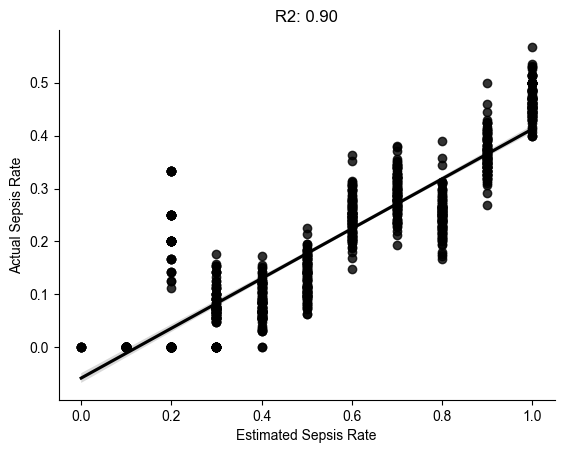

In [28]:
df_estimator = DigitalFamilyBinary()

df_estimator.fit(X_subset, features=probability_columns)
X_test['Sepsis Protein Prob'] = df_estimator.predict(
    X_test[probability_columns], 
    features=probability_columns, 
    target_column="sepsis_or_septic_shock"
)

X_test_results = pd.concat([X_test,  df_estimator.bootstrap_results_df], axis=1)

fig, ax = plt.subplots()

protein_estimated_sepsis, protein_linregress_results, protein_predictions, protein_corr, protein_pval = plot_results(X_test_results, df_estimator.bootstrap_results_df)

sns.regplot(
    data=protein_estimated_sepsis,
    x="Estimated Sepsis Rate",
    y="Actual Sepsis Rate",
    ax=ax,
    color="k"
)

ax.set_title(
    f"R2: {protein_linregress_results.rvalue:.2f}"
)

sns.despine()


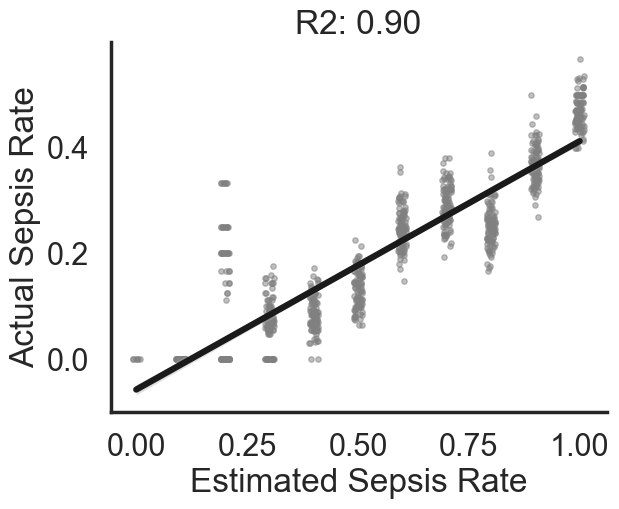

In [29]:
import matplotlib.pyplot as plt

sns.set_theme(context="poster", style="white", font_scale=1)

fig, ax = plt.subplots()

sns.regplot(
    data=protein_estimated_sepsis,
    x="Estimated Sepsis Rate",
    y="Actual Sepsis Rate",
    ax=ax,
    scatter_kws={"color": "gray", "alpha": 0.5, "s": 15},
    line_kws={"color": "k", "alpha": 1},
    fit_reg=True,
    ci=95,
    x_jitter=0.01
)

ax.set_title(
    f"R2: {protein_corr:.2f}"
)

sns.despine()

In [30]:
ax.figure.savefig(
    "hero_eval.pdf", dpi=300, bbox_inches="tight"
)

In [31]:
protein_estimated_sepsis.to_csv(
    "hero_eval.tsv",
    sep="\t",
    index=False
)

In [32]:
X_test_results['Sepsis Diagnosis Probability'] = X_test_results[df_estimator.bootstrap_columns].mean(axis=1)

In [40]:
X_test_results['sepsis_sort_order'] = np.abs((X_test_results['Sepsis Diagnosis Probability'] - X_test_results['Sepsis Diagnosis Probability'].mean()) / X_test_results['Sepsis Diagnosis Probability'].std())

In [56]:
X_test_results = X_test_results.sort_values("sepsis_sort_order", ascending=True)

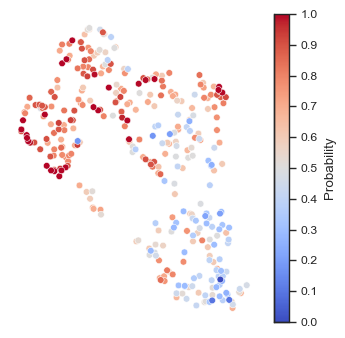

In [58]:
fig, ax = plt.subplots()

sns.set_theme(context="paper", style="white", font_scale=1)

g = sns.scatterplot(
    data=X_test_results,
    x="UMAP 1",
    y="UMAP 2",
    hue="Sepsis Diagnosis Probability",
    palette=cmap,
    ax=ax,
    legend=False,
    #alpha=0.8
)

cbar = fig.colorbar(
    mpl.cm.ScalarMappable(
        norm=mpl.colors.Normalize(vmin=0.0, vmax=1.0, clip=False), cmap=cmap),
        ticks=np.arange(0.0, 1.0 + 0.1, 0.1),
        label="Probability",
        ax=ax)

fig.set_size_inches((4, 4))

sns.despine()
ax.set_axis_off()
fig.savefig(
    "sepsis_map_hero.pdf", dpi=300, bbox_inches="tight"
)

plt.show()